In [1]:
import time
import random
import numpy as np
import cartopy.crs as ccrs
from skyfield.api import load
from skyfield.api import wgs84
import matplotlib.pyplot as plt 

url = 'https://celestrak.org/NORAD/elements/supplemental/sup-gp.php?FILE=starlink&FORMAT=tle'

In [2]:
def skyfield_geodesic_latlon(static=True):

    sats = load.tle_file(url)
    if  static:
        print('Loaded', len(sats), 'Starlink satellites')
    
    t = load.timescale().now()
        
    lats = []
    lons = []
    for sat in sats:
        geocentric = sat.at(t)  
        lat, lon = wgs84.latlon_of(geocentric) # Geodetic latitude and longitude
        lats.append(lat.degrees)
        lons.append(lon.degrees)
    
    return lons, lats

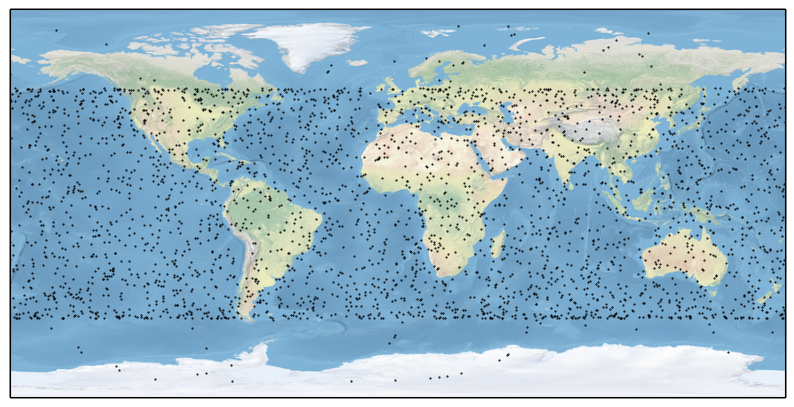

In [3]:
def starlink_positions(animation=False, time=10):

    fig = plt.figure(figsize=[10,15])
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
    ax.stock_img()
    plt.ion()    
    
    lons, lats = skyfield_geodesic_latlon()
    ax.scatter(lons, lats, color='k', marker='.', s=1, transform=ccrs.PlateCarree())#transform=ccrs.Geodetic())
    
    if animation:
        from IPython.display import display, clear_output
        for i in range(time):
            ax.cla()
            ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
            ax.stock_img()
            lons, lats = skyfield_geodesic_latlon(static=False)
            ax.scatter(lons, lats, color='k', marker='.', s=1, transform=ccrs.PlateCarree())#transform=ccrs.Geodetic())
            display(fig)
            clear_output(wait=True)
            #plt.pause(0.1)
        
    plt.show()

starlink_positions(animation=True)

# Trace satellite path

In [4]:
def predict_track(mins, n=1):
    
    plt.figure(figsize=[10,15])
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.stock_img()

    ts = load.timescale()
    now = ts.now()
    dates = ts.utc(now.utc[0], now.utc[1], now.utc[2], now.utc[3], range(mins)) 
    
    sats = load.tle_file(url)
    
    for i in range(n):
        sat = random.randint(0, len(sats))
        sats.remove(sats[sat])
        lats = []
        lons = []
        for time in dates:
            geocentric = sats[sat].at(time)  
            lat, lon = wgs84.latlon_of(geocentric) # Geodetic latitude and longitude
            lats.append(lat.degrees)
            lons.append(lon.degrees)

        plt.plot(lons, lats, c='k', zorder=0, transform=ccrs.Geodetic(), lw=1)
        plt.scatter(lons[0], lats[0], c='C{}'.format(i), s=20, zorder=1, label=sats[sat].name)
        ax.legend(bbox_to_anchor=(1.0, 1.0))
        
    plt.show()

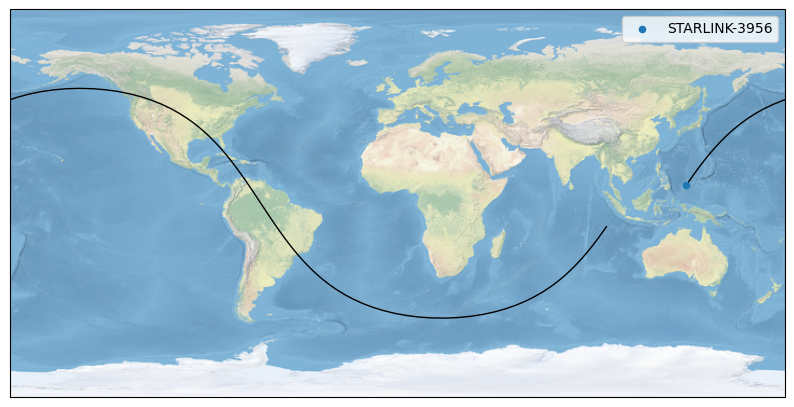

In [5]:
predict_track(mins=90, n=1)